# <span style="color: fuchsia"> Lung Cancer Detection </span>
### <span style ="color : green ">    PraveenKarthik Arumugam </span>
### <span style ="color : green ">    www.lindedin.com/in/pk7779</span>

# <span style="color : fuchsia"> Problem Statement & Type </span>

### <span style="color : green"> To identify whether a patient has lung cancer or not using the symptoms given in the dataset </span>
### <span style="color : green"> Problem Type :: Binary Classification </span>

# <span style="color : fuchsia"> 1. Data Collection </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings("ignore", category=(DataConversionWarning))
warnings.filterwarnings("ignore", category=(ConvergenceWarning))

df_lc=pd.read_csv("survey lung cancer.csv")
df_lc

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# <span style="color : fuchsia"> 2. EDA - Exploratory Data Analysis </span>

In [2]:
df_lc.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [3]:
df_lc.shape

(309, 16)

In [4]:
df_lc.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### <span style="color : Fuchsia"> 2.1 Feature Engineering </span>

In [5]:
# Label encoder used to convert the categorical values in "Gender" to numbers and added a new column aka feature called
# "GENDER_NEW"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_gender=pd.DataFrame(le.fit_transform(df_lc['GENDER']))
df_gender=df_gender.rename(columns={0:'GENDER_NEW'})
df_gender
df_lc=pd.concat([df_lc,df_gender], axis=1)
df_lc

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_NEW
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1


In [6]:
df_lc_lung_cancer=pd.DataFrame(le.fit_transform(df_lc['LUNG_CANCER']))
df_lc_lung_cancer
df_lc_lung_cancer=df_lc_lung_cancer.rename(columns={0:'LUNG_CANCER_NEW'})
df_lc_lung_cancer
df_lc=pd.concat([df_lc, df_lc_lung_cancer], axis=1)
df_lc


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_NEW,LUNG_CANCER_NEW
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1,1


In [7]:
#dropping LUNG_CANCER AND GENDER features because they have been converted from categorical to numerical values and
# these numerical values are concatenated as new columns "GENDER_NEW" & "LUNG_CANCER_NEW"
df_lc=df_lc.drop(['GENDER','LUNG_CANCER'],axis=1)
df_lc

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_NEW,LUNG_CANCER_NEW
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,0,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,1


# <span style="color : fuchsia"> 3. Model Development </span>

### <Span style="color : Fuchsia">3.1 Splitting dataset for Training and Testing</span>

In [8]:
from sklearn.model_selection import train_test_split
x=df_lc.drop(['LUNG_CANCER_NEW'],axis=1)
x
y=pd.DataFrame(df_lc['LUNG_CANCER_NEW'])
y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((247, 15), (62, 15), (247, 1), (62, 1))

### <span style="color : Fuchsia"> 3.2 Feature Selection </span>

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Using SelectKBest to find the ranking of features that are closely relevant to the target variable "LUNG_CANCER" 
# which uses statistical methods using chi2 library
top_features= SelectKBest(score_func=chi2,k=15)
top_features.fit(x_train,y_train)
top_features_ranked=pd.DataFrame(top_features.scores_, columns={0:'FEATURE_SCORES'})
# Renaming the score column
top_features_ranked=top_features_ranked.rename(columns={0:'FEATURE_SCORE'})
# Getting columns names from the xtrain dataset and concatenating with the feature scores
top=pd.concat([pd.DataFrame(x_train.columns),top_features_ranked],axis=1)
top_features_ranked=top.rename(columns={0:"FEATURE_NAME"}).nlargest(15,'FEATURE_SCORE',keep='all')
top_features_ranked

,FEATURE_NAME,FEATURE_SCORE
7,ALLERGY,4.521552
9,ALCOHOL CONSUMING,4.081441
12,SWALLOWING DIFFICULTY,3.138517
10,COUGHING,2.688603
8,WHEEZING,2.526787
0,AGE,1.846931
13,CHEST PAIN,1.696437
4,PEER_PRESSURE,1.457184
2,YELLOW_FINGERS,1.343088
6,FATIGUE,1.255540


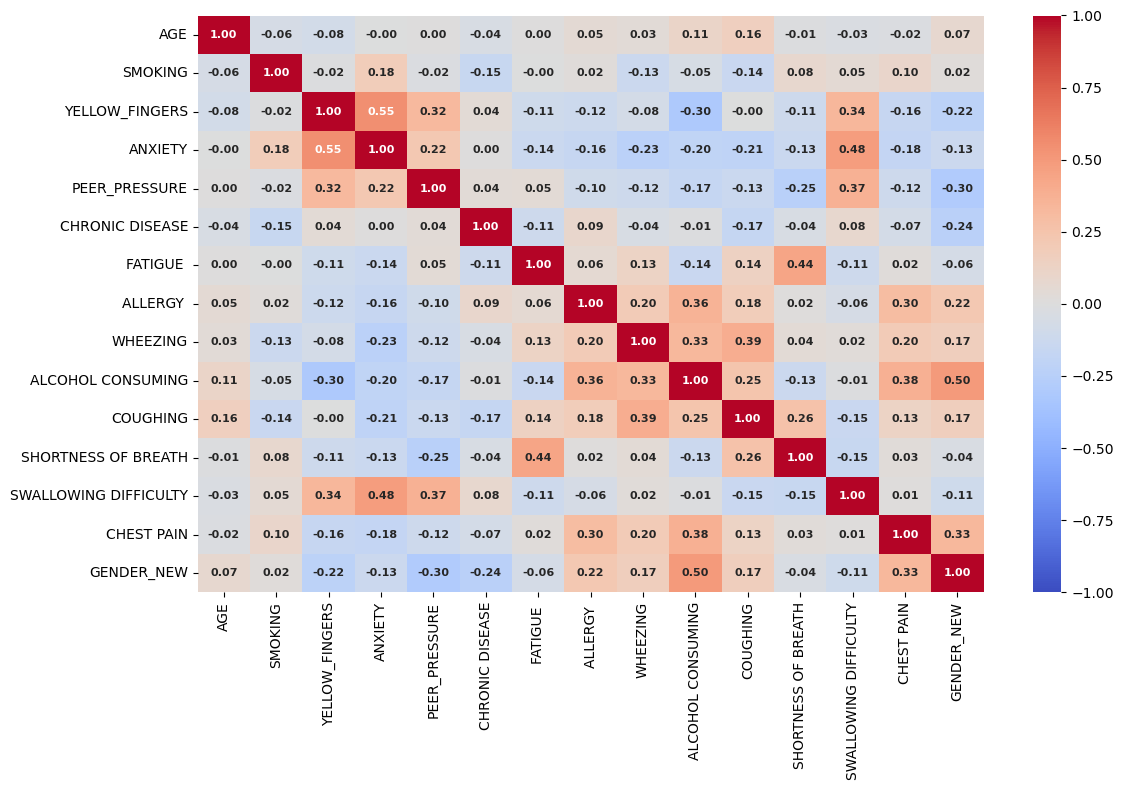

In [21]:
import matplotlib as m
m.pyplot.figure(figsize=(12,8))
df_lc_corr= x_train.corr()
sb.heatmap(df_lc_corr, annot=True, cmap="coolwarm", fmt=".2f",annot_kws={"fontsize": 8,"fontweight":"bold"},vmin=-1 , vmax=1)
m.pyplot.tight_layout()

### <span style="color: fuchsia"> 3.3 Model Selection </span>

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((247, 15), (62, 15), (247, 1), (62, 1))

### <span style="color:green"> Using multiple models across Bagging and Boosting techniques and getting the performance metrics of accuracy using multiple accuracy metrics like accuracy_score, precision_score, recall_score, f1_score, fbeta_score </span>

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, recall_score, precision_score, matthews_corrcoef

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()

models={'lrm':lr,
         'dtm':dt,
        'rfm':rf,
        'abm':ab,
        'gbm':gb
       }

dict_score={}
array_score={}
for i in models:
    model_fit=models[i].fit(x_train, y_train)
    model_pred=model_fit.predict(x_test)
    array_score.update({"accuracy score":accuracy_score(y_test, model_pred)})
    array_score.update({"precision score":precision_score(y_test, model_pred)})
    array_score.update({"recall score":recall_score(y_test, model_pred)})
    array_score.update({"f1 score":f1_score(y_test, model_pred)})
    array_score.update({"fbeta score":fbeta_score(y_test, model_pred,beta=0.5)})
    key=models[i].__class__.__name__
    value=array_score
    dict_score.update({key:value})
    array_score={}
ds=pd.DataFrame(dict_score)
ds


,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
accuracy score,0.967742,0.967742,0.967742,0.983871,0.951613
precision score,0.983333,0.983333,0.983333,0.983607,0.983051
recall score,0.983333,0.983333,0.983333,1.000000,0.966667
f1 score,0.983333,0.983333,0.983333,0.991736,0.974790
fbeta score,0.983333,0.983333,0.983333,0.986842,0.979730


### <span style="color:green">Even though the scores are given across diff. metrics for each ML algorithm in the above dataframe, taking a mean of all the score for a given model to understand which ML model is more accurate. In this case, AdaBoostClassifier is the most accurate ML algorithm to be used, as you can see recall_score is 1 and a mean for this ML algorithm in the below table is the highest to 0.989211 </span>

In [13]:
ds.describe()

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.980215,0.980215,0.980215,0.989211,0.971170
std,0.006973,0.006973,0.006973,0.006861,0.012553
min,0.967742,0.967742,0.967742,0.983607,0.951613
25%,0.983333,0.983333,0.983333,0.983871,0.966667
50%,0.983333,0.983333,0.983333,0.986842,0.974790
75%,0.983333,0.983333,0.983333,0.991736,0.979730
max,0.983333,0.983333,0.983333,1.000000,0.983051


### <span style="color : green"> The accuracy scores per ML algo is mapped in graph for better visualization </span>

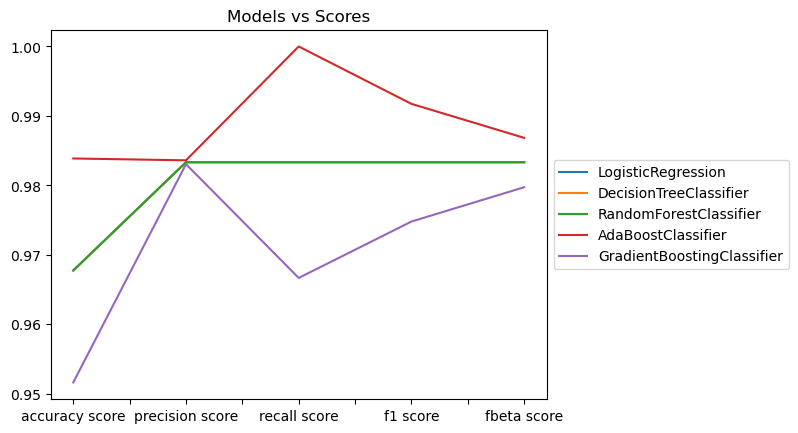

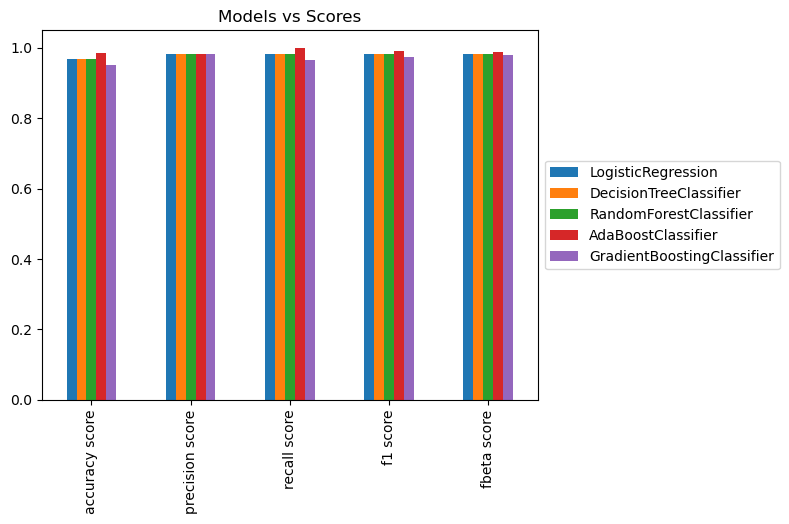

In [14]:
m.figure.Figure(figsize=(10,10))
plots=["line", "bar"]
for i in plots:
    ds.plot(kind=i,title="Models vs Scores",legend=True)
#     mp.ylim(0,1)
    mp.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mp.show()